MovieWriter imagemagick unavailable; using Pillow instead.


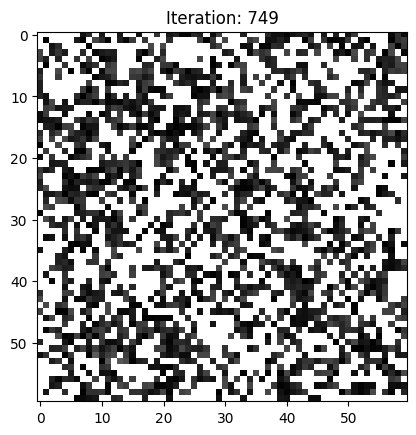

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
np.random.seed(seed=int(time.time()))
random.seed(time.time())
# Size of the grid
size = 60

# Number of initialized cells
m = 1800

# Initialize the grid with -1 (indicating empty cells)
grid = -2 * np.ones((size, size))
marks_current = np.zeros((size, size))
marks_previous = np.zeros((size, size))

# Randomly choose m cells to initialize with fitness values
init_cells = random.sample(list(np.ndindex((size, size))), m)
for cell in init_cells:
    grid[cell] = np.random.rand()

fig, ax = plt.subplots()
count = 0

def update(num):
    ax.clear()
    ax.imshow(grid, cmap='Greys',  interpolation='nearest')
    ax.set_title(f"Iteration: {num}")

    global marks_previous
    global marks_current
    global count
    for i in range(2):
        # Before proceeding, copy the current marks to the "previous" marks array
        marks_previous = np.copy(marks_current)

        # Reset the current marks array to be all zeros at the start of each iteration
        marks_current = np.zeros((size, size))

        # Find the index of the particle with minimum fitness
        valid_indices = np.argwhere(grid >= 0)
        min_index = valid_indices[np.argmin(grid[valid_indices[:, 0], valid_indices[:, 1]])]
        
        # Mutate the particle and its neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (0,0)]:
            nx, ny = min_index[0] + dx, min_index[1] + dy
            nx = nx % size
            ny = ny % size

            if(grid[nx][ny] >= 0):
                grid[nx, ny] = np.random.rand()
        
        # For each cell
        for index, value in np.ndenumerate(grid):
            # reverse order every other timestep
            if (count % 2) - 1 < 0:
                index = (size - index[0] - 1, size - index[1] - 1)


            if(grid[index[0]][index[1]] == -2): continue

            # Check Moore neighborhood for particles and marks
            neighborhood = []
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                nx, ny = index[0] + dx, index[1] + dy
                nx = nx % size
                ny = ny % size
                neighborhood.append((nx, ny))

            free_cells = [cell for cell in neighborhood if grid[cell] == -2]
            
            # If no free adjacent cells
            if not free_cells:
                continue
            else:
                # If there are marks in the neighborhood with fitness higher than its own,
                # move to the site of the nearest mark which is better than its own fitness
                better_marked_neighbors = [cell for cell in free_cells if marks_current[cell] > grid[index]]

                if better_marked_neighbors:
                    target = min(better_marked_neighbors, key=lambda x: marks_current[x])
                    # Leave a mark (fitness value) in the previous site
                    marks_current[index] = grid[index]
                    # Take the fitness value of the new site and erase the mark there
                    grid[index], grid[target] = grid[target], grid[index]
                    marks_current[target] = -2
                    marks_previous[target] = -2
                else:
                    target = random.choice(free_cells)
                    # Leave a mark (fitness value) in the previous site
                    marks_current[index] = grid[index]
                    # Take the fitness value of the new site and erase the mark there
                    grid[index], grid[target] = grid[target], grid[index]
                    marks_current[target] = -2
                    marks_previous[target] = -2
        count += 1
ani = FuncAnimation(fig, update, frames=range(750), repeat=False, interval=100)

# Save the animation as a GIF
ani.save('2DMigration.gif', writer='imagemagick')


plt.show()


In [8]:
for i in range(100):
    print((i % 20) - 10)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
